In [41]:
!pip install --upgrade joblib==1.1.0
!pip install Jinja2

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import mglearn # 하니 오류남 #!pip install --upgrade joblib==1.1.0 하니까 오류 안남..
import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set_style('white')

In [43]:
df = pd.read_csv('../data/bank/bank-full.csv', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [45]:
39922 / 45211 * 100

88.30151954170445

In [46]:
5289 / 45211 * 100

11.698480458295547

In [47]:
0.8830151954170445 + 0.11698480458295547

1.0

In [48]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


표준 편차 큰 거: balance, duration, pdays

balance 1362유로 = 약 191만원, 102127유로 = 약 1억 4,313만원

duration 258초 = 약 4.3분, 4918초 = 약 81.9분

pdays 871일 = 약 29달

In [49]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [50]:
df.info() # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [51]:
df['job'].value_counts() #12개 #명목

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

blue-collar : 육체노동자

admin : 행정직

entrepreneur : 사업가

In [52]:
df['marital'].value_counts() #명목

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [53]:
df['education'].value_counts() #순서

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

secondary : 중등 교육

tertiary : 3차(대학) 교육

primary : 초등 교육

In [54]:
df['default'].value_counts() #명목

no     44396
yes      815
Name: default, dtype: int64

In [55]:
df['housing'].value_counts() #명목

yes    25130
no     20081
Name: housing, dtype: int64

In [56]:
25130 / (25130 + 20081) #55%가 yes

0.5558381809736569

In [57]:
df['loan'].value_counts() #명목

no     37967
yes     7244
Name: loan, dtype: int64

In [58]:
df['month'].value_counts() #명목
#캠페인 기간은 2008년 5월부터 2010년 11월(총 8+12+11=31)으로 5~11월은 3번 있었고(총 21), 12월은 2번(총 2), 1~4월도 2번(총 8)

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

5월,7월,8월,6월,11월,4월,2월,1월,10월,9월,3월,12월 순

9월, 10월은 마지막 연락 월로써 상대적으로 낮은 편인 듯

In [59]:
df['contact'].value_counts() #명목 #cellular은 무선 전화

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [60]:
df['poutcome'].value_counts() #명목

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

## 종속 변수(y) 수치형으로 바꿔주기

In [61]:
#no를 0으로, yes를 1로 변환
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1

In [62]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [64]:
df['y'] = df['y'].astype('int64')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


## 시각화

In [66]:
df['default'].value_counts() #명목

no     44396
yes      815
Name: default, dtype: int64

In [67]:
44396 / (44396 + 815) #98%가 no

0.9819734135497998

In [68]:
df.groupby(['default','y'])['y'].count() 

default  y
no       0    39159
         1     5237
yes      0      763
         1       52
Name: y, dtype: int64

In [69]:
pd.crosstab(df.default, df.y, margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
default,,,
no,39159,5237,44396
yes,763,52,815
All,39922,5289,45211


In [70]:
df.groupby(['contact','y'])['y'].count() 

contact    y
cellular   0    24916
           1     4369
telephone  0     2516
           1      390
unknown    0    12490
           1      530
Name: y, dtype: int64

In [71]:
pd.crosstab(df.contact, df.y, margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
contact,,,
cellular,24916,4369,29285
telephone,2516,390,2906
unknown,12490,530,13020
All,39922,5289,45211


In [72]:
4369 / 5289 # 정기 예금에 가입한 사람들(y 값 1) 중 cellualr 유형

0.8260540744942333

In [73]:
df.groupby(['poutcome','y'])['y'].count() 

poutcome  y
failure   0     4283
          1      618
other     0     1533
          1      307
success   0      533
          1      978
unknown   0    33573
          1     3386
Name: y, dtype: int64

In [74]:
pd.crosstab(df.poutcome, df.y, margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
poutcome,,,
failure,4283,618,4901
other,1533,307,1840
success,533,978,1511
unknown,33573,3386,36959
All,39922,5289,45211


In [75]:
978 / 5289 # 정기 예금에 가입한 사람들(y 값 1) 중 이전 마케팅 캠페인 결과 성공한 사람들(poutcome 값 success)

0.1849120816789563

In [76]:
3386 / 5289 # 정기 예금에 가입한 사람들(y 값 1) 중 이전 마케팅 캠페인 결과 알 수 없는 사람들(poutcome 값 unknown)이 64 % 차지

0.6401966345244848

# 수치형

### 히스토그램

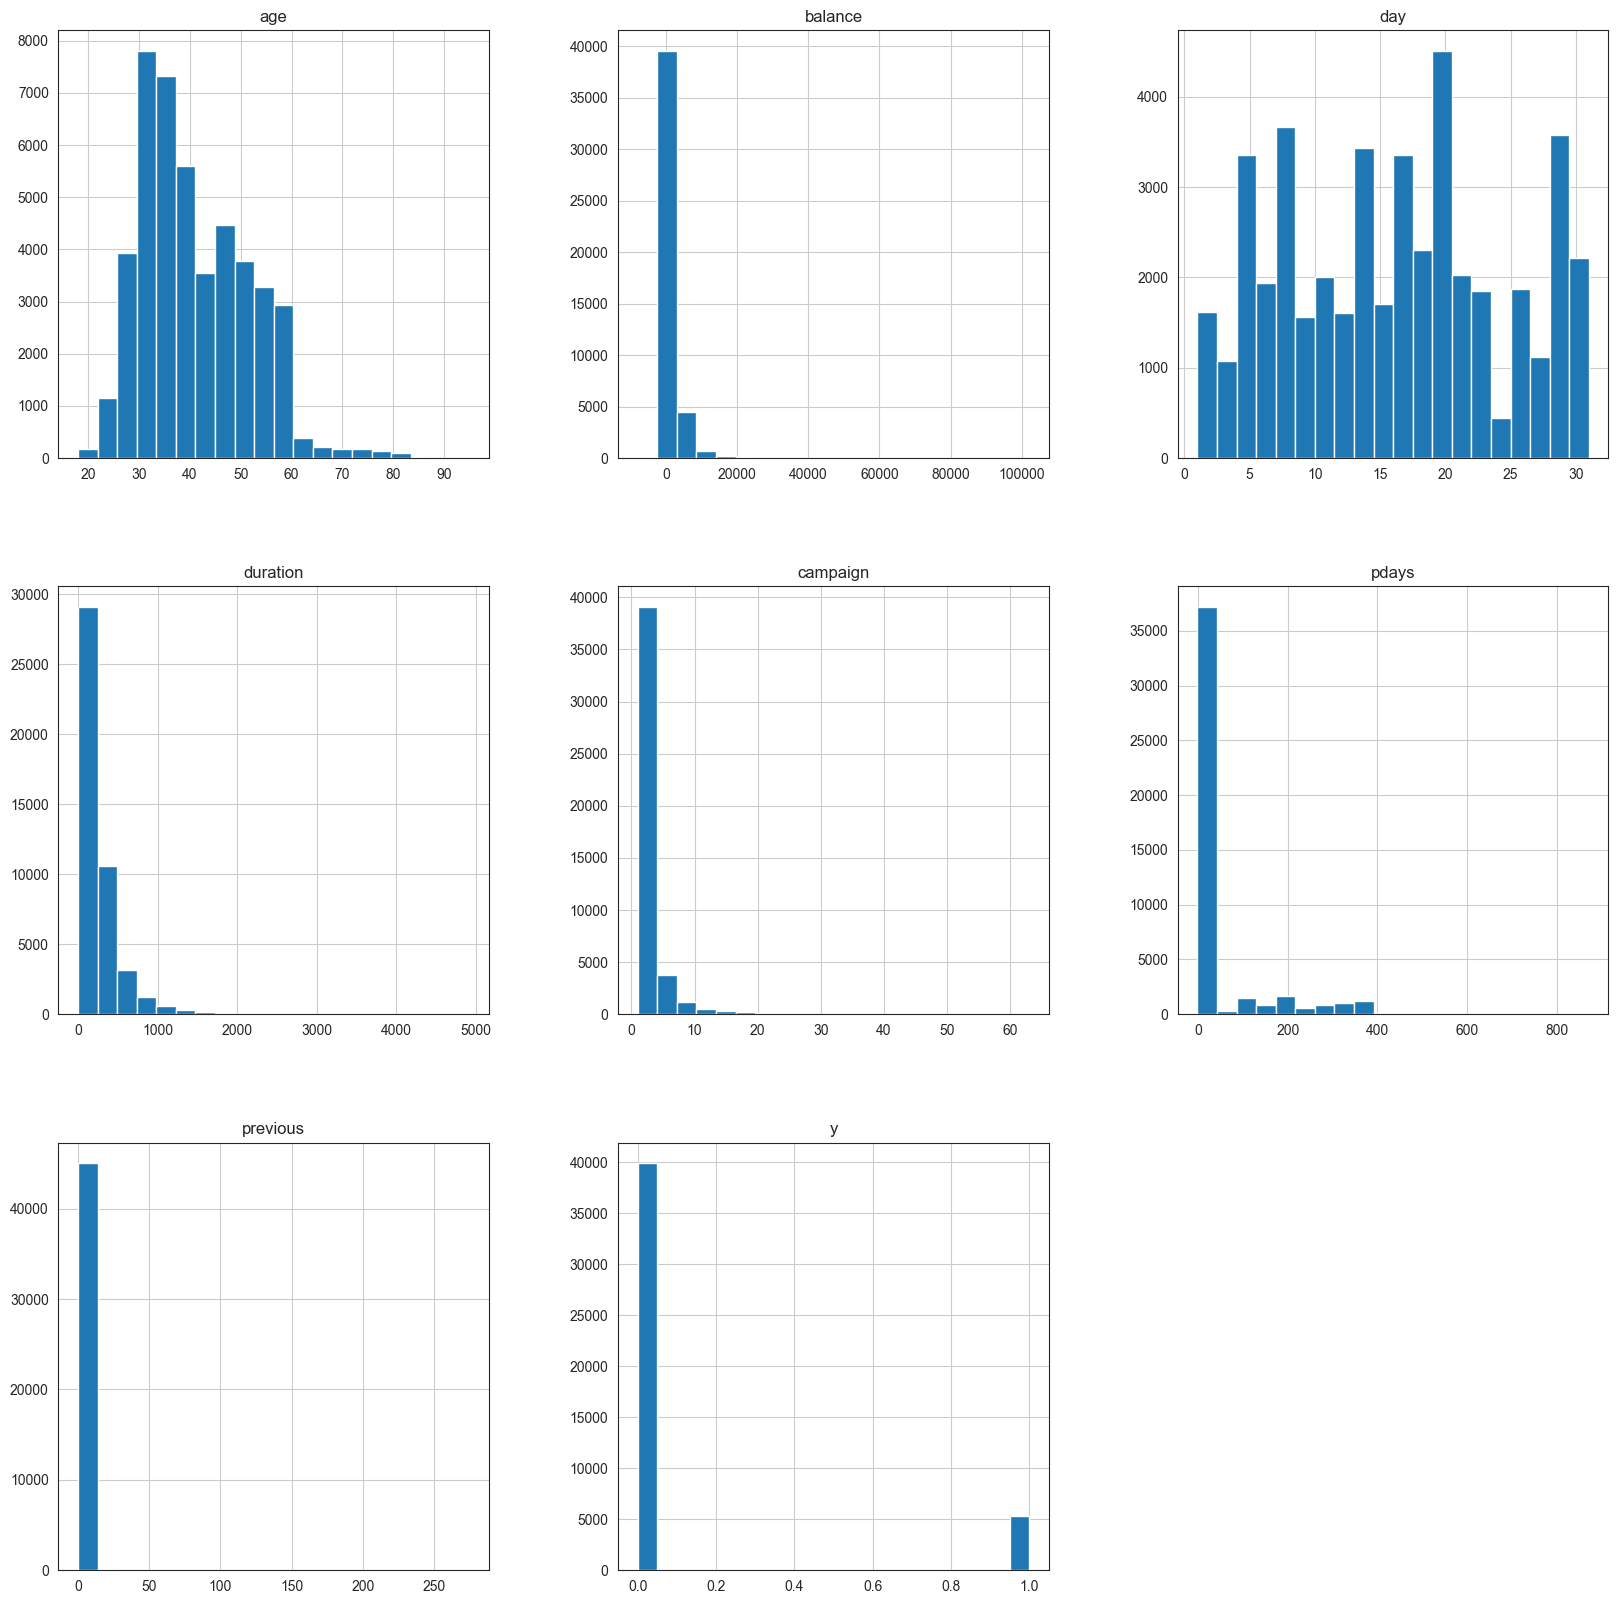

In [77]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20, 20))
plt.show()


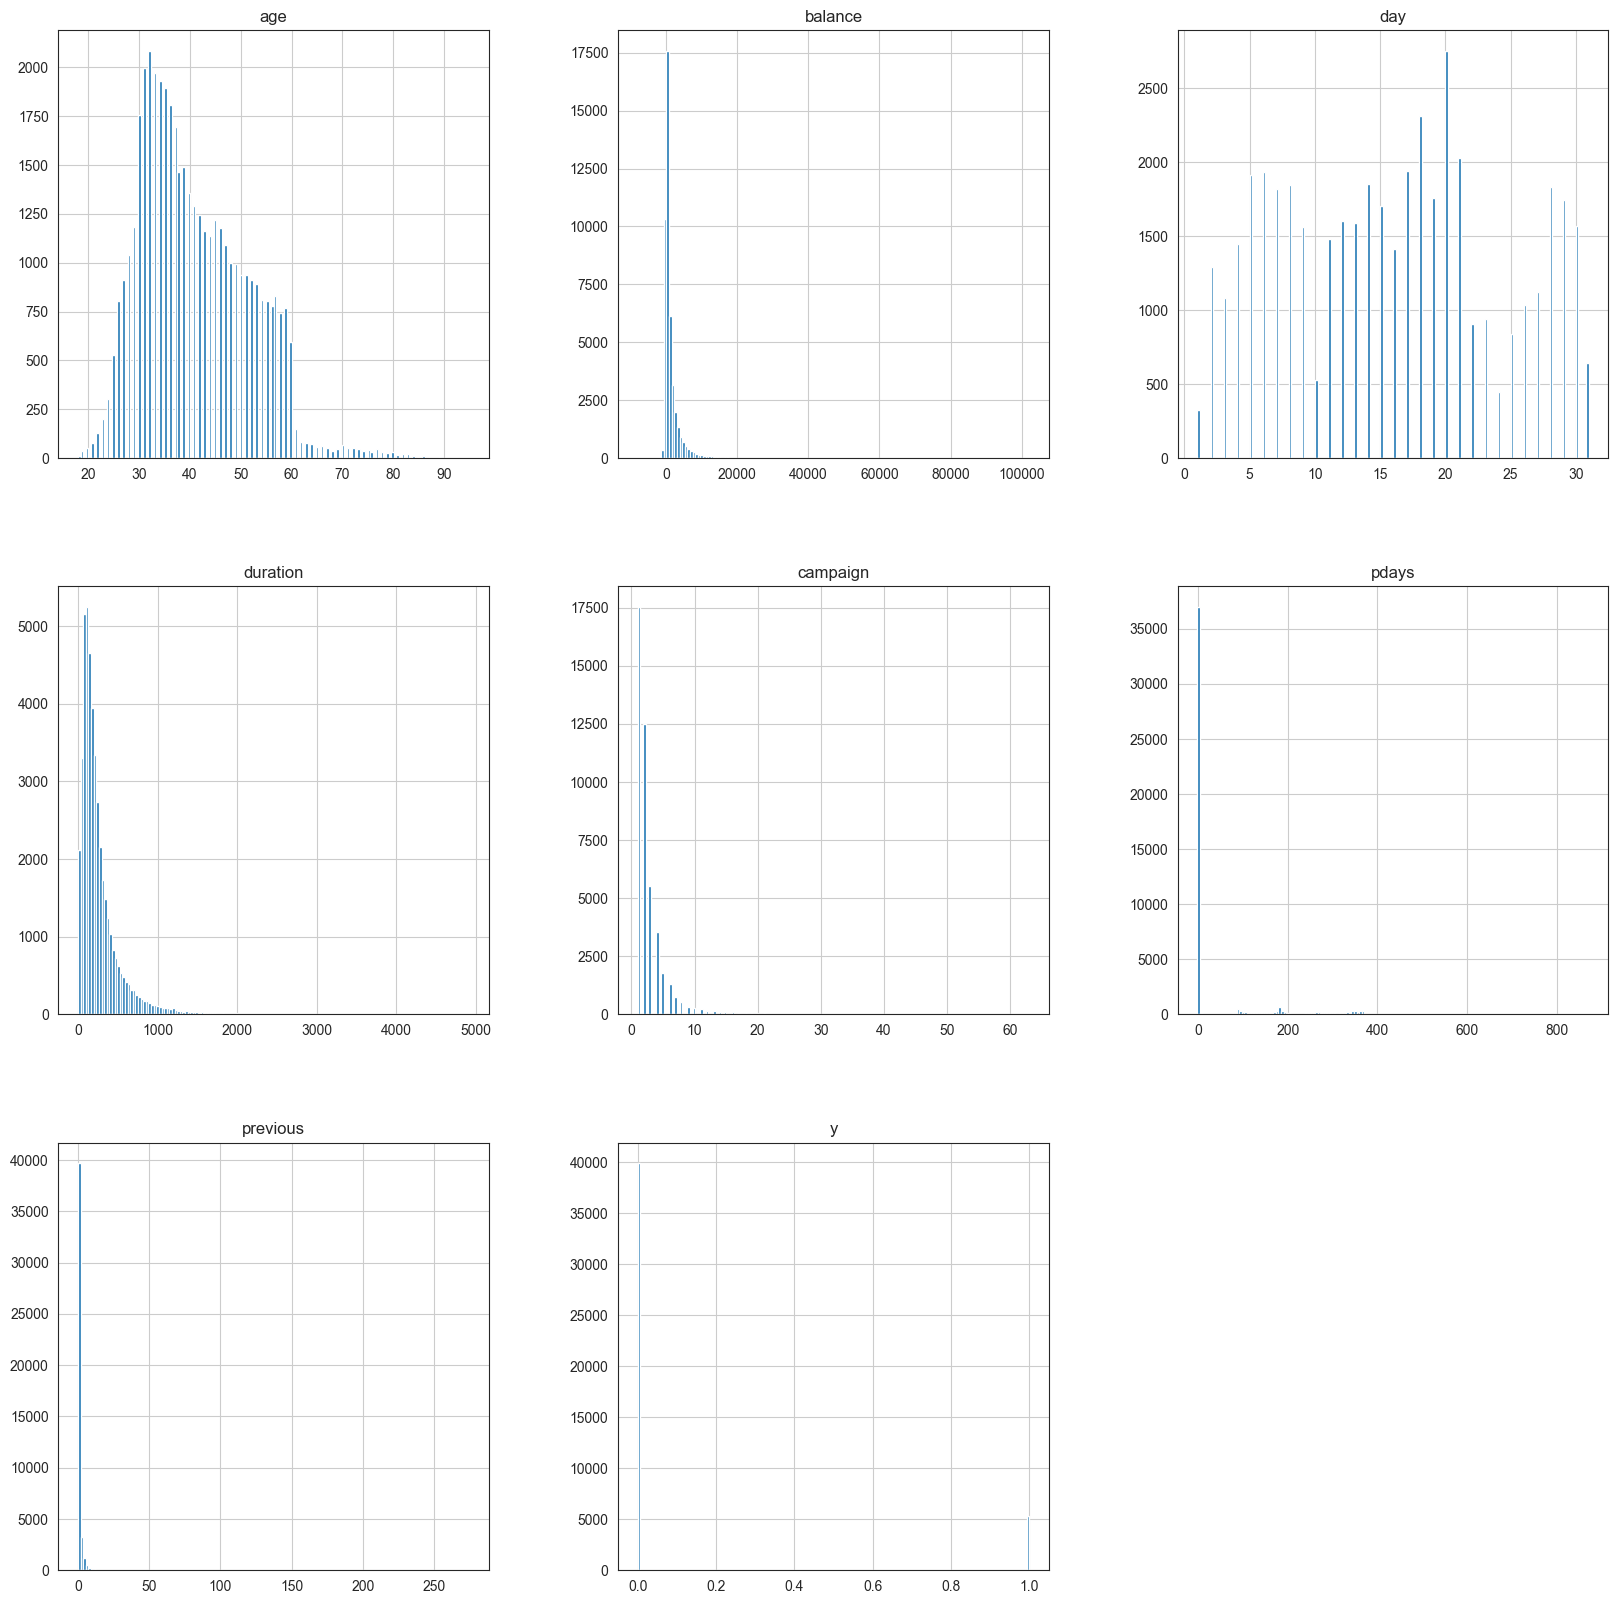

In [78]:
df.hist(bins=150, figsize=(20, 20))
plt.show()

In [85]:
import numpy as np
import scipy.stats as scs

In [89]:
for col in df.columns:
    if (df[col].dtype != 'object'):
        print(col, '왜도: ', df[col].skew())
        print(col, '첨도: ', df[col].kurt())
        print(scs.describe(np.array(df[col])))


age 왜도:  0.6848179257252598
age 첨도:  0.3195703759105042
DescribeResult(nobs=45211, minmax=(18, 95), mean=40.93621021432837, variance=112.7581072828605, skewness=0.6847952047866451, kurtosis=0.31940232676995794)
balance 왜도:  8.360308326166326
balance 첨도:  140.75154662504158
DescribeResult(nobs=45211, minmax=(-8019, 102127), mean=1362.2720576850766, variance=9270598.954472251, skewness=8.360030947252687, kurtosis=140.73584832577242)
day 왜도:  0.09307901402122411
day 첨도:  -1.0598973728286003
DescribeResult(nobs=45211, minmax=(1, 31), mean=15.80641879188693, variance=69.2636093179959, skewness=0.09307592583897241, kurtosis=-1.0599128678304488)
duration 왜도:  3.144318099423456
duration 첨도:  18.153915269019706
DescribeResult(nobs=45211, minmax=(0, 4918), mean=258.1630797814691, variance=66320.57409008562, skewness=3.1442137770103913, kurtosis=18.151774935186822)
campaign 왜도:  4.898650166179674
campaign 첨도:  39.2496508023021
DescribeResult(nobs=45211, minmax=(1, 63), mean=2.763840658246887, var

In [79]:
df.loc[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,0
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,0
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,0
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,1
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,1
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,0
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,0


In [80]:
df.loc[df['duration'] <= 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,0
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


# train test 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

31647 13564 31647 13564


In [ ]:
BK = X_train.copy()

## 상관관계

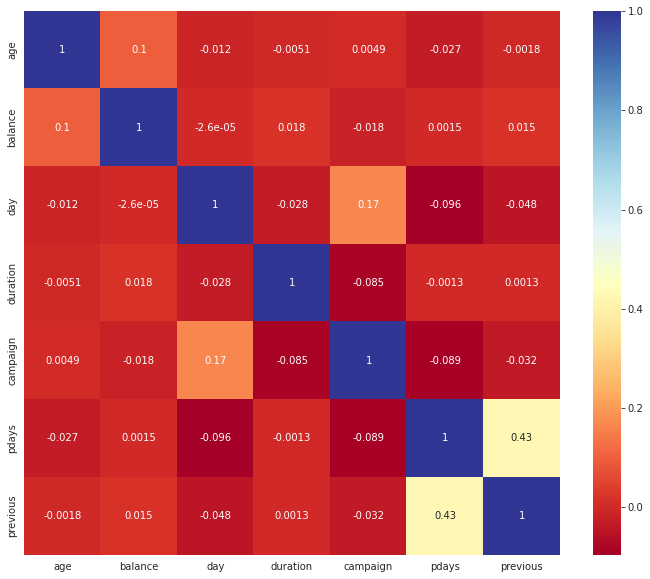

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["y"].sort_values(ascending=False) # 수치형 중 y와 상관관계 수치로 나타낸 것

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64

## 박스 플랏

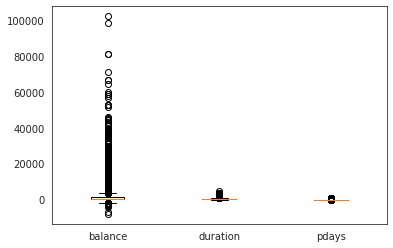

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df['balance'], df['duration'], df['pdays']])
plt.xticks([1, 2, 3], ['balance', 'duration', 'pdays' ])
plt.show()

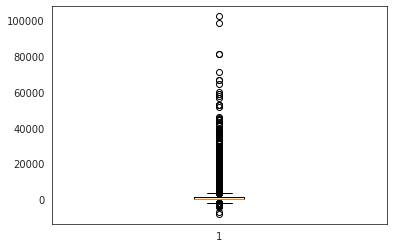

<Figure size 288x288 with 0 Axes>

In [ ]:
plt.boxplot(df['balance']) # 한 변수
plt.rcParams['figure.figsize'] = 15,8
plt.figure(figsize=(4,4))
plt.show()